In [22]:
import pandas as pd
import glob


all_files = glob.glob("crawlings/imdb_crawl*.csv")
print(all_files)
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

['crawlings\\imdb_crawl0_10000.csv', 'crawlings\\imdb_crawl10001_20000.csv', 'crawlings\\imdb_crawl20001_30000.csv', 'crawlings\\imdb_crawl30001_40000.csv', 'crawlings\\imdb_crawl40001_50000.csv']


In diesem Code werden mehrere CSV-Dateien aus dem Crawlings-Verzeichnis eingelesen, die dem Muster imdb_crawl*.csv entsprechen. Das sind jeweils die Crawling-Ergebnisse aus dem Skript, welches sie unter diesem Namenmuster abgespeichert hat. Die Daten werden dann zusammengefügt und in einem df gespeichert.

In [23]:
df

,imdbID,original title,genres,countries,country codes,box office,certificates,rating,votes,plot outline,year,kind,full-size cover url
0,2,Le clown et ses chiens,"Animation,Short",France,fr,NaN,NaN,5.8,264.0,NaN,1892.0,movie,https://m.media-amazon.com/images/M/MV5BZDI4ZD...
1,7,Corbett and Courtney Before the Kinetograph,"Short,Sport",United States,us,NaN,NaN,5.4,811.0,James J. Corbett and Peter Courtney meet in a ...,1894.0,short,https://m.media-amazon.com/images/M/MV5BODA4ZT...
2,1,Carmencita,"Documentary,Short",United States,us,NaN,NaN,5.7,1949.0,"Presumably, the first woman ever to appear in ...",1894.0,short,https://m.media-amazon.com/images/M/MV5BZmUzOW...
3,4,Un bon bock,"Animation,Short",France,fr,NaN,NaN,5.6,179.0,A wanderer comes into a cabaret in the country...,1892.0,movie,https://m.media-amazon.com/images/M/MV5BOGI5Nj...
4,3,Pauvre Pierrot,"Animation,Comedy,Short,Romance",France,fr,NaN,Germany:12,6.5,1781.0,NaN,1892.0,short,https://m.media-amazon.com/images/M/MV5BYWZiY2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49453,49999,Blondie,"Comedy,Family",United States,us,NaN,NaN,7.5,95.0,NaN,1957.0,tv series,https://m.media-amazon.com/images/M/MV5BNzE0Yz...
49454,49998,The Big Record,Music,United States,us,NaN,NaN,7.0,18.0,NaN,1957.0,tv series,https://m.media-amazon.com/images/M/MV5BODgwOW...
49455,49996,Bachelor Father,"Comedy,Family",United States,us,NaN,NaN,7.3,526.0,Never-married attorney Bentley Gregg took on t...,1957.0,tv series,https://m.media-amazon.com/images/M/MV5BZDI5OG...
49456,49992,Alcoa Theatre,Drama,United States,us,NaN,NaN,7.4,76.0,When The Alcoa Hour dramatic anthology series ...,1957.0,tv series,https://m.media-amazon.com/images/M/MV5BZWUxMj...


Data Cleaning:

In [38]:
df.drop_duplicates(inplace=True) #Delete duplicated

C:\Users\swt4fe\AppData\Local\Temp\ipykernel_21912\3006716147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [25]:
df = df.dropna(subset=['imdbID', 'original title', 'year', 'rating']) #Delete empyt columns

In [26]:
df['original title'] = df['original title'].str.strip()
df['genres'] = df['genres'].str.strip()
df['countries'] = df['countries'].str.strip()
df['country codes'] = df['country codes'].str.strip()
df['certificates'] = df['certificates'].str.strip()
df['plot outline'] = df['plot outline'].str.strip()
df['kind'] = df['kind'].str.strip() # Strip str columns

C:\Users\swt4fe\AppData\Local\Temp\ipykernel_21912\2027244070.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['original title'] = df['original title'].str.strip()
C:\Users\swt4fe\AppData\Local\Temp\ipykernel_21912\2027244070.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genres'] = df['genres'].str.strip()
C:\Users\swt4fe\AppData\Local\Temp\ipykernel_21912\2027244070.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [27]:
df['rating'] = df['rating'].astype(float)
df['votes'] = df['votes'].astype(int)
df['year'] = df['year'].astype(int) # Correct datatypes

C:\Users\swt4fe\AppData\Local\Temp\ipykernel_21912\4210018484.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating'] = df['rating'].astype(float)
C:\Users\swt4fe\AppData\Local\Temp\ipykernel_21912\4210018484.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['votes'] = df['votes'].astype(int)
C:\Users\swt4fe\AppData\Local\Temp\ipykernel_21912\4210018484.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [28]:
df['countries'] = df['countries'].str.lower() #make str column lower-case
df['country codes'] = df['country codes'].str.upper() #make str column upper-case

C:\Users\swt4fe\AppData\Local\Temp\ipykernel_21912\1970059360.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['countries'] = df['countries'].str.lower()
C:\Users\swt4fe\AppData\Local\Temp\ipykernel_21912\1970059360.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country codes'] = df['country codes'].str.upper()


Ein kurzer Blick auf die Genres im Datensatz

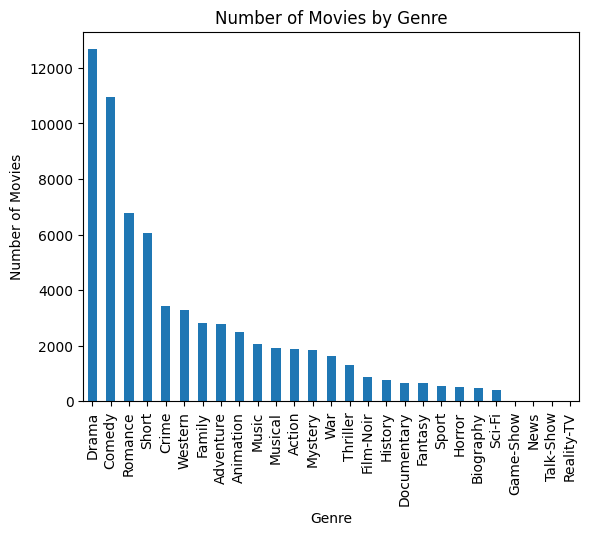

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a pandas dataframe with the genre column
df_genre = pd.DataFrame(df['genres'].str.split(',', expand=True).stack().reset_index(level=1, drop=True), columns=['genre'])

# Create a bar chart of the number of movies per genre
df_genre['genre'].value_counts().plot(kind='bar')
plt.title('Number of Movies by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.show()

Und auf die im Datensatz vorhandenen Veröffentlichungsdaten und deren Anzahl

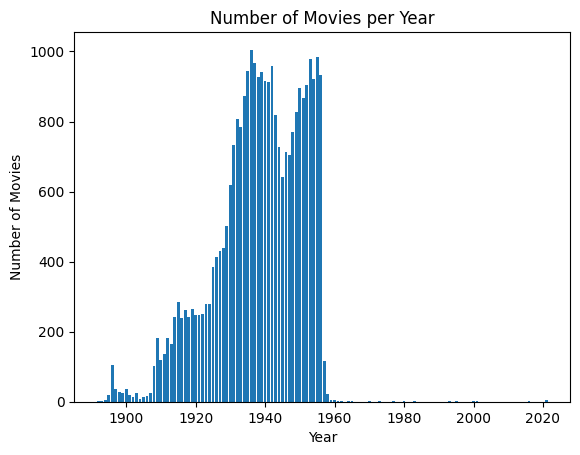

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the dataframe by year and count the number of movies for each year
df_year_count = df.groupby('year')['imdbID'].count().reset_index(name='count')

# Create a bar chart of the number of movies per year
plt.bar(df_year_count['year'], df_year_count['count'])
plt.title('Number of Movies per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

Nun wird der gleiche Plot erstellt wie in data_exploration.ipynb. 

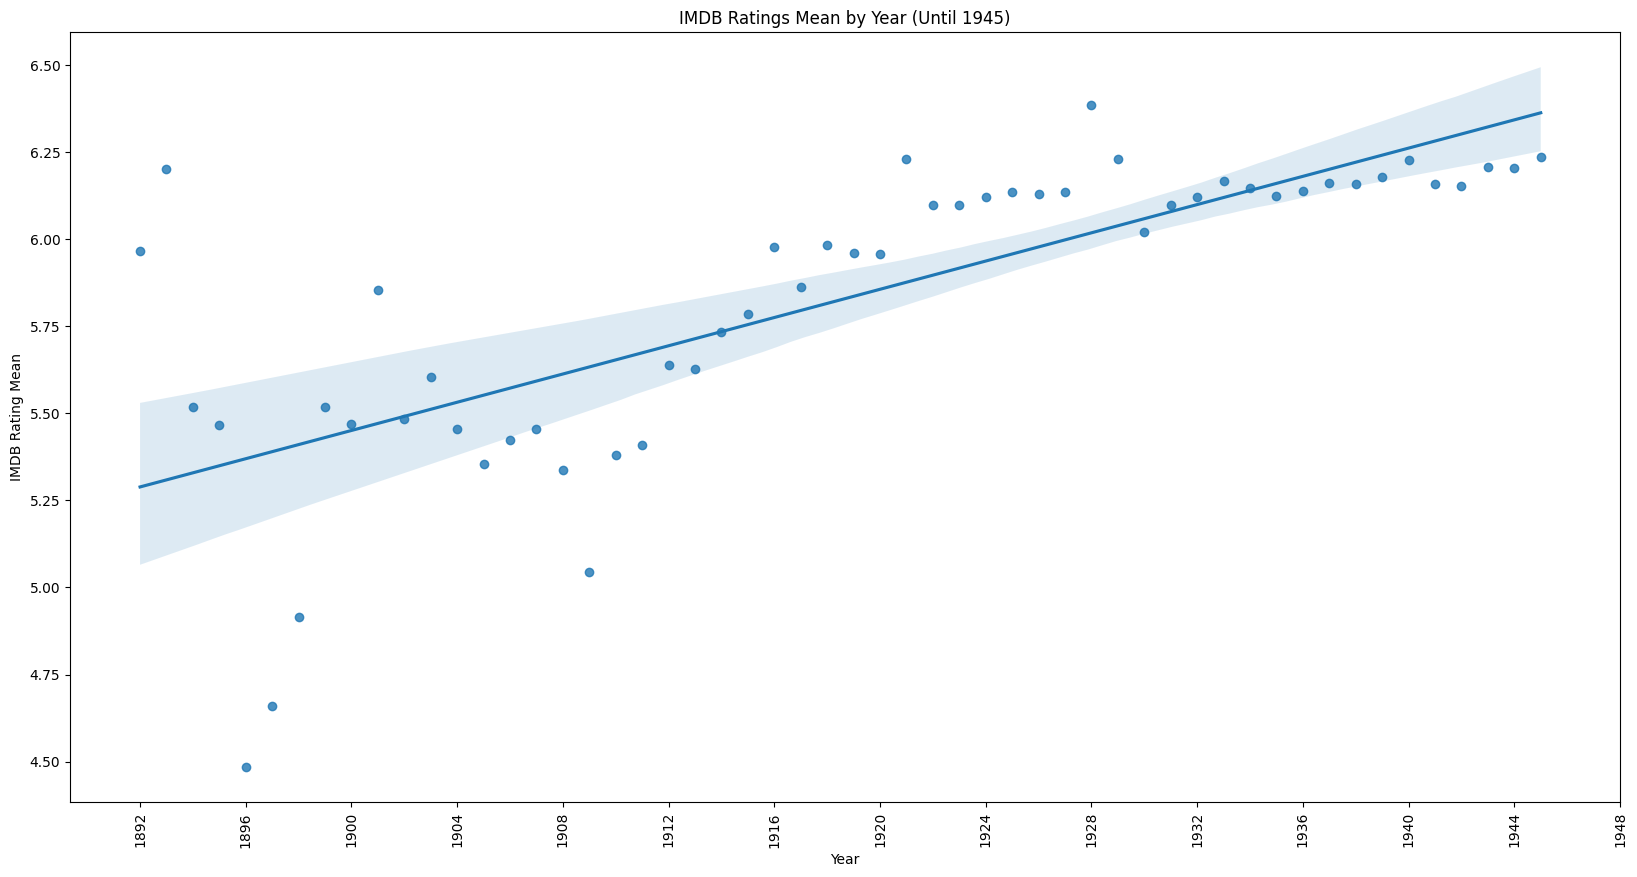

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the dataframe to only include data up to 1945
df_filtered = df[df['year'] <= 1945]

# Group the filtered dataframe by year and calculate the mean IMDb score for each year
df_year_score = df_filtered.groupby('year')['rating'].mean().reset_index(name='mean_score')

# Create the regression plot
fig, ax = plt.subplots(figsize=(20, 10))
sns.regplot(x="year", y="mean_score", data=df_year_score, ax=ax)

# Add labels
plt.xlabel('Year')
plt.ylabel('IMDB Rating Mean')
plt.title('IMDB Ratings Mean by Year (Until 1945)')

# Set the x-axis ticks and tick labels
xticks = range(int(df_year_score['year'].min()), int(df_year_score['year'].max()) + 5, 4)
ax.set_xticks(xticks)
ax.set_xticklabels(xticks)

# Rotate the x-axis tick labels
for item in ax.get_xticklabels():
    item.set_rotation(90)

# Display the plot
plt.show()




Dieser Code erzeugt eine Regressionsgrafik der durchschnittlichen IMDb-Bewertungen nach Jahr bis 1945. Das Diagramm untersucht, ob der Trend zu höheren Bewertungen für früher veröffentlichte Filme über den im Datensatz vorhandenen Zeitraum hinausgeht. Tatsächlich ist ein gegenteiliger Trend zu erkennen: Filme, die vor 1945 produziert wurden, verlieren an Popularität, wie ihre durchschnittlichen IMDb-Bewertungen zeigen.